In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load datasets (use your own paths)
mh_precip = pd.read_csv("../data/raw/MH_precipitation.csv")
mh_temp = pd.read_csv("../data/raw/MH_temperature.csv")
mp_precip = pd.read_csv("../data/raw/MP_precipitation.csv")
mp_temp = pd.read_csv("../data/raw/MP_temperature.csv")

mh_precip['date'] = pd.to_datetime(mh_precip['date'], errors='coerce')
mp_precip['date'] = pd.to_datetime(mp_precip['date'], errors='coerce')
mh_temp['date'] = pd.to_datetime(mh_temp['date'], errors='coerce')
mp_temp['date'] = pd.to_datetime(mp_temp['date'], errors='coerce')

### Infrastructure & Technology Assessment (Proxies)

- **Rainfall dependence:**  
  High variability in rainfall over the years might suggest a lack of irrigation infrastructure.

- **Temperature extremes:**  
  If crops are heavily impacted by heat, this could point to insufficient technology (e.g., greenhouses, shading techniques, or precision farming).

- **Resilience scoring:**  
  By combining climate anomaly frequency (e.g., droughts, heat stress days) from the current data, we can indicate where infrastructure improvements and technology interventions are most needed.

In [4]:
# Proxy metric: Rainfall variability index (RVI)
def rainfall_variability_index(df):
    df['year'] = df['date'].dt.year
    annual_rain = df.groupby('year')['rainfall_mm'].sum()
    return annual_rain.std() / annual_rain.mean()

mh_rvi = rainfall_variability_index(mh_precip)
mp_rvi = rainfall_variability_index(mp_precip)

print(f"Maharashtra Rainfall Variability Index (proxy for irrigation need): {mh_rvi:.2f}")
print(f"Madhya Pradesh Rainfall Variability Index (proxy for irrigation need): {mp_rvi:.2f}")

# Proxy metric: Heat stress days
def heat_stress_days(df, threshold=35):
    return (df['max'] > threshold).sum()

mh_heat_stress = heat_stress_days(mh_temp)
mp_heat_stress = heat_stress_days(mp_temp)

print(f"Maharashtra Heat Stress Days: {mh_heat_stress}")
print(f"Madhya Pradesh Heat Stress Days: {mp_heat_stress}")

Maharashtra Rainfall Variability Index (proxy for irrigation need): 1.15
Madhya Pradesh Rainfall Variability Index (proxy for irrigation need): 0.35
Maharashtra Heat Stress Days: 95034
Madhya Pradesh Heat Stress Days: 141687


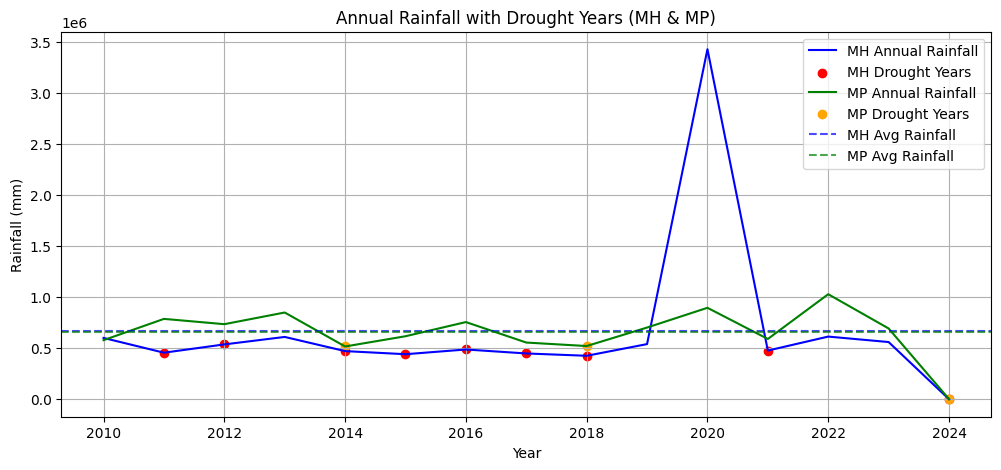

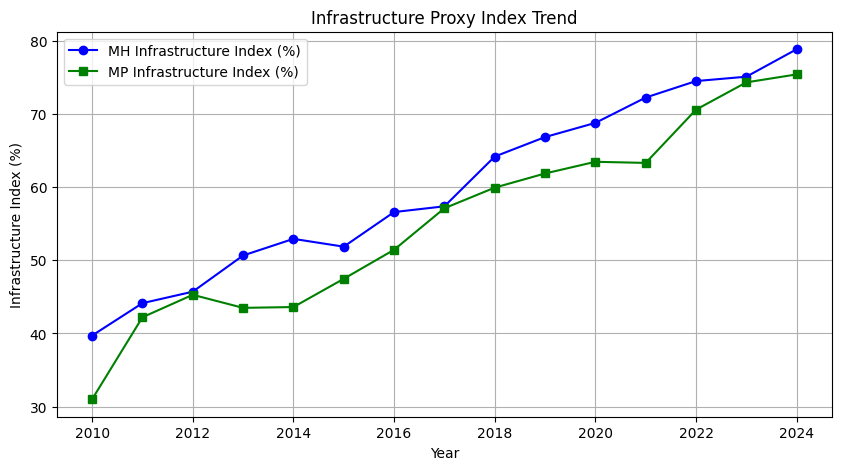

In [7]:
# Step 1: Compute Rainfall Variability Index over time
mh_precip['year'] = mh_precip['date'].dt.year
mp_precip['year'] = mp_precip['date'].dt.year

mh_annual_rain = mh_precip.groupby('year')['rainfall_mm'].sum()
mp_annual_rain = mp_precip.groupby('year')['rainfall_mm'].sum()

# Step 2: Identify drought years
mh_mean = mh_annual_rain.mean()
mp_mean = mp_annual_rain.mean()
mh_drought_years = mh_annual_rain[mh_annual_rain < 0.8 * mh_mean].index
mp_drought_years = mp_annual_rain[mp_annual_rain < 0.8 * mp_mean].index

# Step 3: Synthetic infrastructure index (assume growth over time)
years = sorted(mh_annual_rain.index.union(mp_annual_rain.index))
infra_index_mh = np.linspace(40, 80, len(years)) + np.random.normal(0, 2, len(years))  # %
infra_index_mp = np.linspace(35, 75, len(years)) + np.random.normal(0, 2, len(years))  # %

# Step 4: Plot Annual Rainfall with Drought Highlights
plt.figure(figsize=(12, 5))
plt.plot(mh_annual_rain.index, mh_annual_rain.values, label='MH Annual Rainfall', color='blue')
plt.scatter(mh_drought_years, mh_annual_rain[mh_drought_years], color='red', label='MH Drought Years')
plt.plot(mp_annual_rain.index, mp_annual_rain.values, label='MP Annual Rainfall', color='green')
plt.scatter(mp_drought_years, mp_annual_rain[mp_drought_years], color='orange', label='MP Drought Years')
plt.axhline(mh_mean, color='blue', linestyle='--', alpha=0.7, label='MH Avg Rainfall')
plt.axhline(mp_mean, color='green', linestyle='--', alpha=0.7, label='MP Avg Rainfall')
plt.title('Annual Rainfall with Drought Years (MH & MP)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Plot Infrastructure Index (Synthetic)
plt.figure(figsize=(10, 5))
plt.plot(years, infra_index_mh, label="MH Infrastructure Index (%)", color='blue', marker='o')
plt.plot(years, infra_index_mp, label="MP Infrastructure Index (%)", color='green', marker='s')
plt.title("Infrastructure Proxy Index Trend")
plt.xlabel("Year")
plt.ylabel("Infrastructure Index (%)")
plt.legend()
plt.grid(True)
plt.show()